In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from keras.layers import *
from keras.models import *
from keras.utils import *
from sklearn.preprocessing import *
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [2]:
# 지도학습 - 정답데이터 있음.
dataset = tf.keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = dataset.load_data()

In [3]:
print(f'X_train.shape:{X_train.shape}')

X_train.shape:(60000, 28, 28)


In [4]:
# N x T x D - 60000, 28, 28
# 음영데이터 - 스펙트럼을 작게 하는 것이 좋다.(0 ~ 1 소수점 - 일반화)
# 독립변수 - X_train, X_test(이미지) / 255.0
X_train, X_test = X_train/255.0, X_test/255.0

In [5]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [6]:
X_train[0].shape

(28, 28)

In [7]:
# build a model (unit = 128, features = 10)
i = Input(shape = X_train[0].shape) # 28 x 28 (T x D) - sequences data
x = LSTM(128, return_sequences = True)(i) # many to many
x = GlobalMaxPool1D()(x)

x = Dense(10, activation = 'softmax')(x) # 손글씨 데이터 0 ~ 9 (10개)
model = Model(i, x)
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam',
              metrics = ['accuracy']) # 정수값이 나오게(sparse_categorical_crossentropy) - 역 log함수 사용(crossentropy)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 lstm (LSTM)                 (None, 28, 128)           80384     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
Total params: 81,674
Trainable params: 81,674
Non-trainable params: 0
_________________________________________________________________


In [8]:
# params 계산
# LSTM = (features * unit) + (unit * unit) + (features * unit)
# = (28 * 128) + (128 * 128) + (28 * 128) = 23552
# 망각데이터 때문에 3,4배 증가함.
# Dense = (unit * 10) + bias = 128 * 10 + 10 = 1290

In [9]:
r = model.fit(X_train, Y_train, epochs = 20, validation_data = (X_test, Y_test))

Epoch 1/20
1875/1875 [==============================] - 20s 10ms/step - loss: 0.3892 - accuracy: 0.8809 - val_loss: 0.1351 - val_accuracy: 0.9594
Epoch 2/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1110 - accuracy: 0.9675 - val_loss: 0.0826 - val_accuracy: 0.9754
Epoch 3/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0767 - accuracy: 0.9776 - val_loss: 0.0646 - val_accuracy: 0.9812
Epoch 4/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0580 - accuracy: 0.9828 - val_loss: 0.0557 - val_accuracy: 0.9825
Epoch 5/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0483 - accuracy: 0.9858 - val_loss: 0.0601 - val_accuracy: 0.9819
Epoch 6/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0387 - accuracy: 0.9882 - val_loss: 0.0426 - val_accuracy: 0.9865
Epoch 7/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0331 - accuracy: 0.9896 - val_loss: 0.0422 - v

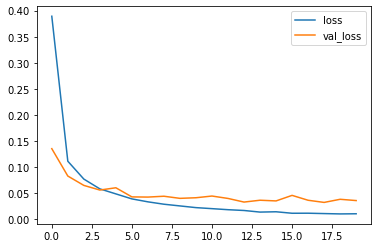

In [10]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

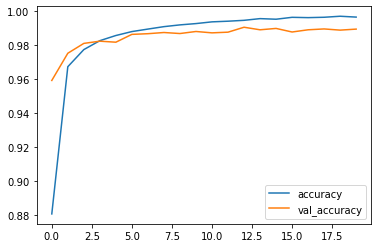

In [11]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.show()

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, 
                          title='Confusion matrix', cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
  
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Confusion matrix, without normalization
[[ 977    0    0    0    1    0    1    1    0    0]
 [   0 1128    2    1    0    0    0    2    2    0]
 [   1    2 1023    0    1    1    0    3    1    0]
 [   0    0    4 1002    0    2    0    1    1    0]
 [   0    0    0    1  966    0    4    2    1    8]
 [   0    0    0    4    0  885    1    1    1    0]
 [   1    4    0    0    1    9  942    0    1    0]
 [   0    3    8    0    0    0    0 1015    0    2]
 [   1    0    1    2    0    2    0    2  965    1]
 [   0    0    0    3    3    4    0    2    4  993]]


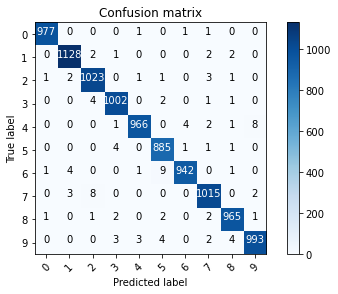

In [13]:
p_test = model.predict(X_test).argmax(axis = 1)
cm = confusion_matrix(Y_test, p_test)
plot_confusion_matrix(cm, list(range(10))) # 숫자가 높을수록 정확도 높음.

In [14]:
misclassified_idx = np.where(p_test != Y_test)[0]
misclassified_idx

array([  62,  104,  115,  158,  217,  247,  320,  321,  445,  449,  582,
        659,  900,  956,  965,  995, 1014, 1039, 1182, 1226, 1242, 1299,
       1328, 1530, 1549, 1681, 1754, 1790, 1901, 1982, 2035, 2118, 2130,
       2135, 2182, 2447, 2462, 2488, 2597, 2648, 2654, 2678, 2758, 2836,
       2927, 2939, 2995, 3005, 3023, 3060, 3073, 3225, 3266, 3365, 3422,
       3490, 3534, 3780, 3818, 3838, 3869, 3926, 3941, 4078, 4201, 4248,
       4271, 4300, 4437, 4443, 4497, 4536, 4601, 4699, 4740, 4823, 5210,
       5457, 5654, 5937, 5973, 6555, 6559, 6571, 6576, 6597, 6625, 6783,
       8094, 8316, 8408, 8504, 8527, 9009, 9015, 9019, 9024, 9530, 9664,
       9669, 9729, 9782, 9792, 9793], dtype=int64)

Text(0.5, 1.0, 'True label: 6, predicted: 5')

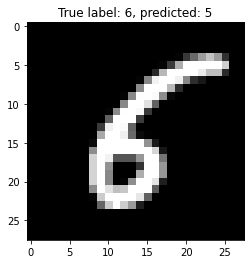

In [18]:
idx = np.random.choice(misclassified_idx)
plt.imshow(X_test[idx], cmap = 'gray')
plt.title(f'True label: {Y_test[idx]}, predicted: {p_test[idx]}')